# SVR

 - train set : test set = 0.7 : 0.3
 
 - parameter 
 c = 10
 eplison = 0.1

 

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.utils import shuffle
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/태블로공유폴더/작업/아파트 상세정보   실거래가 데이터/세종시_아파트_데이터_생활권과_지수적용가격.csv")
data.head(3)

,난방방식,연면적,동수,복도유형,주거전용면적,주차관제,총세대수,용적률,건폐율,저층,고층,전용면적,거래시아파트나이,계약년월,세대당주차대수,생활권1,생활권2,생활권3,생활권4,기타,거래금액,반복매매지수,보정가격
0,0,206412.34,17,0,104167.151,1,1111,181,20,9,29,96.788,0,201907,1.64,0,0,0,1,0,52000,1.112347,46748.001947
1,0,206412.34,17,0,104167.151,1,1111,181,20,9,29,84.454,0,201909,1.64,0,0,0,1,0,44325,1.123978,39435.827339
2,0,206412.34,17,0,104167.151,1,1111,181,20,9,29,84.454,0,201911,1.64,0,0,0,1,0,54800,1.113912,49195.967446


In [ ]:
# 데이터 train test split 방법 변화
X = data.drop(columns=["계약년월","거래금액","반복매매지수"])

X0_2 = X[X["보정가격"]<20000].drop(columns=["보정가격"])
X2_4 = X[(X["보정가격"]>=20000) & (X["보정가격"]<40000)].drop(columns=["보정가격"])
X4_6 = X[(X["보정가격"]>=40000) & (X["보정가격"]<60000)].drop(columns=["보정가격"])
X6_8 = X[(X["보정가격"]>=60000) & (X["보정가격"]<80000)].drop(columns=["보정가격"])
X8_10 = X[(X["보정가격"]>=80000) & (X["보정가격"]<100000)].drop(columns=["보정가격"])
X10_ = X[X["보정가격"]>=100000].drop(columns=["보정가격"])

y0_2 = X[X["보정가격"]<20000]["보정가격"]
y2_4 = X[(X["보정가격"]>=20000) & (X["보정가격"]<40000)]["보정가격"]
y4_6 = X[(X["보정가격"]>=40000) & (X["보정가격"]<60000)]["보정가격"]
y6_8 = X[(X["보정가격"]>=60000) & (X["보정가격"]<80000)]["보정가격"]
y8_10 = X[(X["보정가격"]>=80000) & (X["보정가격"]<100000)]["보정가격"]
y10_ = X[X["보정가격"]>=100000]["보정가격"]

X_train1, X_test1, y_train1, y_test1 = train_test_split(X0_2, y0_2, test_size = 0.2, random_state=1004)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2_4, y2_4, test_size = 0.2, random_state=1004)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X4_6, y4_6, test_size = 0.2, random_state=1004)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X6_8, y6_8, test_size = 0.2, random_state=1004)
X_train5, X_test5, y_train5, y_test5 = train_test_split(X8_10, y8_10, test_size = 0.2, random_state=1004)
X_train6, X_test6, y_train6, y_test6 = train_test_split(X10_, y10_, test_size = 0.2, random_state=1004)

X_train = pd.concat([X_train1,X_train2,X_train3,X_train4,X_train5,X_train6])
X_test = pd.concat([X_test1,X_test2,X_test3,X_test4,X_test5,X_test6])
y_train = pd.concat([y_train1,y_train2,y_train3,y_train4,y_train5,y_train6])
y_test = pd.concat([y_test1,y_test2,y_test3,y_test4,y_test5,y_test6])

In [ ]:
X = data.drop(columns=["계약년월","거래금액","반복매매지수","보정가격"])
y = data["보정가격"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1004)

In [ ]:
y_test

7403     25369.190026
19712     5051.096503
2484     29788.851074
19366    25354.137240
19070    20186.791955
             ...     
12370    22290.273427
4089     31013.903537
18713     5482.545499
8382     40666.632499
12825    25108.796298
Name: 보정가격, Length: 4044, dtype: float64

In [ ]:
data[data["보정가격"]>100000]

,난방방식,연면적,동수,복도유형,주거전용면적,주차관제,총세대수,용적률,건폐율,저층,고층,전용면적,거래시아파트나이,계약년월,세대당주차대수,생활권1,생활권2,생활권3,생활권4,기타,거래금액,반복매매지수,보정가격
83,0,141373.5383,24,0,71965.2287,1,784,180,22,8,29,102.6287,1,202006,1.56,0,0,0,1,0,115500,1.149101,100513.334151
94,0,141373.5383,24,0,71965.2287,1,784,180,22,8,29,134.8864,1,202011,1.56,0,0,0,1,0,170000,1.482710,114654.945466
2878,0,226646.9100,13,2,127588.3900,1,1328,186,17,8,29,149.8600,8,202006,1.42,0,1,0,0,0,125000,1.149101,108780.664666
3440,0,104263.5490,13,0,72652.5581,1,1027,183,16,10,29,125.0776,3,202007,1.44,0,1,0,0,0,140000,1.345862,104022.583527
3452,0,104263.5490,13,0,72652.5581,1,1027,183,16,10,29,98.1866,3,202008,1.44,0,1,0,0,0,149900,1.453288,103145.444525
3453,0,104263.5490,13,0,72652.5581,1,1027,183,16,10,29,98.1866,3,202009,1.44,0,1,0,0,0,150000,1.492225,100521.031365
3546,0,85279.4875,10,0,42191.7564,1,445,183,17,7,29,133.4907,3,202006,1.53,0,1,0,0,0,138000,1.149101,120093.853791
3693,0,47565.7432,5,0,22965.2656,1,222,183,23,10,24,107.6708,3,202007,1.77,0,1,0,0,0,139000,1.345862,103279.565073
3694,0,47565.7432,5,0,22965.2656,1,222,183,23,10,24,107.6708,3,202007,1.77,0,1,0,0,0,140000,1.345862,104022.583527
3699,0,47565.7432,5,0,22965.2656,1,222,183,23,10,24,107.6708,3,202008,1.77,0,1,0,0,0,149900,1.453288,103145.444525


In [ ]:
from sklearn.model_selection import GridSearchCV
def svc_param_selection(X, y, nfolds):
    param_grid = {'C':[0.001,0.01,0.1,1,10,100,1000,10000] }
    grid_search = GridSearchCV(LinearSVR(), param_grid, cv=nfolds, verbose=2)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [ ]:
# 파라미터 조절
svc_param_selection(X, y, 3)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] C=0.001 .........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


[CV] .......................................... C=0.001, total=   1.9s
[CV] C=0.001 .........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] .......................................... C=0.001, total=   1.9s
[CV] C=0.001 .........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] .......................................... C=0.001, total=   1.6s
[CV] C=0.01 ..........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ........................................... C=0.01, total=   1.7s
[CV] C=0.01 ..........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ........................................... C=0.01, total=   1.7s
[CV] C=0.01 ..........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ........................................... C=0.01, total=   1.7s
[CV] C=0.1 ...........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ............................................ C=0.1, total=   1.6s
[CV] C=0.1 ...........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ............................................ C=0.1, total=   1.7s
[CV] C=0.1 ...........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ............................................ C=0.1, total=   1.6s
[CV] C=1 .............................................................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] .............................................. C=1, total=   1.7s
[CV] C=1 .............................................................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] .............................................. C=1, total=   1.8s
[CV] C=1 .............................................................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] .............................................. C=1, total=   1.7s
[CV] C=10 ............................................................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ............................................. C=10, total=   1.8s
[CV] C=10 ............................................................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ............................................. C=10, total=   1.8s
[CV] C=10 ............................................................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ............................................. C=10, total=   1.7s
[CV] C=100 ...........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ............................................ C=100, total=   1.7s
[CV] C=100 ...........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ............................................ C=100, total=   1.8s
[CV] C=100 ...........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ............................................ C=100, total=   1.9s
[CV] C=1000 ..........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ........................................... C=1000, total=   1.8s
[CV] C=1000 ..........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ........................................... C=1000, total=   1.7s
[CV] C=1000 ..........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ........................................... C=1000, total=   1.8s
[CV] C=10000 .........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] .......................................... C=10000, total=   1.8s
[CV] C=10000 .........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] .......................................... C=10000, total=   1.9s
[CV] C=10000 .........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:   42.1s finished


[CV] .......................................... C=10000, total=   1.7s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


{'C': 1}

In [ ]:
svm_reg = LinearSVR(C=1,epsilon=10000)
svm_reg.fit(X_train, y_train)
y_test_pred = svm_reg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


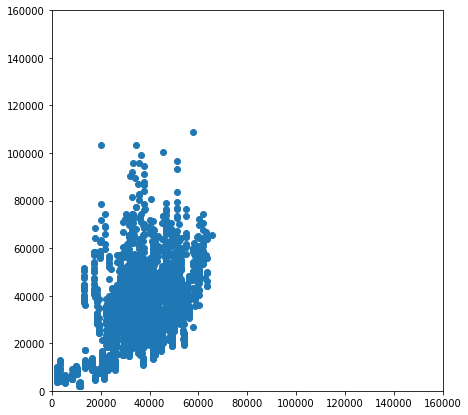

In [ ]:
plt.figure(figsize=(7,7))
plt.axis([0, 160000, 0, 160000])
plt.scatter( y_test_pred,y_test)

In [ ]:
mse = mean_squared_error(y_test, y_test_pred)
evs = explained_variance_score(y_test, y_test_pred) 
print("\n#### Performance ####")
print("Mean squared error =", round(mse, 2))
print("Explained variance score =", round(evs, 2))


#### Performance ####
Mean squared error = 788610334.62
Explained variance score = -0.72


In [ ]:
# L1 베이스로 feature 추출
lsvr = LinearSVR(C=1, epsilon=10000).fit(X, y)
model = SelectFromModel(lsvr, prefit=True)
X_new = model.transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
# 추출한 데이터 스플릿
nX_train, nX_test, ny_train, ny_test = train_test_split(X_new, y, test_size = 0.2, random_state=1500)

In [ ]:
X_new[10] 

array([181.   ,  29.   ,  96.788,   0.   ])

In [ ]:
# 추출한 데이터로 예측
newlsvr = LinearSVR(C = 1,epsilon=10000).fit(nX_train, ny_train)
new_pred = newlsvr.predict(nX_test)

<Figure size 720x720 with 0 Axes>

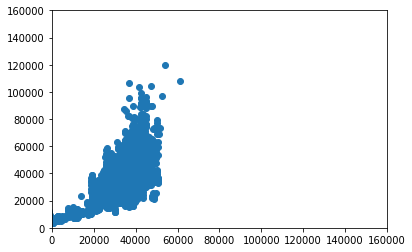

<Figure size 720x720 with 0 Axes>

In [ ]:
# 추출한 데이터 예측값과 실제값 비교 train에 없는 가격 있을 수도 있음. c 파라미터 조절
plt.scatter(new_pred, ny_test)
plt.axis([0, 160000, 0, 160000])
plt.figure(figsize = (10,10))

In [ ]:
mse = mean_squared_error(ny_test,new_pred)
evs = explained_variance_score(ny_test, new_pred) 
print("\n#### Performance ####")
print("Mean squared error =", round(mse, 2))
print("Explained variance score =", round(evs, 2))


#### Performance ####
Mean squared error = 157975359.51
Explained variance score = 0.33
